In [1]:
%config Inline_Backend.figure_format = "svg"
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np
import glob

## Funções auxiliares de manipulação de dados

In [2]:
def merge_csvs(path="", del_cols=[]):
    """
    Coloca todos os csvs de uma diretoria num único dataframe
    
    path -> string: diretoria dos dados
    del_cols -> [string]: lista de colunas a serem eliminadas dos csvs
    """
    
    # Guardar os dados csv numa lista de dataframes
    bkgd_data, files = [], glob.glob(path + "*.csv")
    for file in tqdm(files, total=len(files), desc="Generating Dataframes"):
        bkgd_data.append(pd.read_csv(file, header=0))
          
    # Calcular pesos e remover colunas
    for csv in tqdm(bkgd_data, total=len(bkgd_data), desc="Calculating gen_weights"):
        # Sort dos dataframes
        csv.sort_index(axis=1, inplace=True)
        
        # Calcular gen_weights
        csv["gen_xsec"] = csv["gen_xsec"].mean()/csv.shape[0]
        csv.rename(columns={"gen_xsec":"gen_weights"}, inplace=True)
        
        # Remover colunas de dados extra
        for col in del_cols:
            if col in list(csv.columns):
                csv.drop(col, axis=1, inplace=True)
                
    # Concatenar a lista de dataframes
    bkgd_data = pd.concat(bkgd_data)
    
    return bkgd_data

## Gerar os dataframes e np_arrays dos dados

In [3]:
# Create dataframe
data_path = "Data/dileptonic/"
del_cols = ["MissingET_Eta", "gen_decay1", "gen_decay2", "gen_sample", "gen_filter", "gen_decay_filter"]
bkgd_data = merge_csvs(data_path, del_cols)
bkgd_data

Calculating gen_weights: 100%|██████████| 18/18 [00:12<00:00,  1.50it/s]


In [4]:
fcnc_data = pd.read_hdf("Data/FCNC/tZFCNC.h5")
fcnc_data.drop(["MissingET_Eta", "gen_decay1", "gen_decay2"], axis=1, inplace=True)
fcnc_data["gen_xsec"] = fcnc_data["gen_xsec"]/fcnc_data.shape[0]
fcnc_data.rename(columns={"gen_xsec":"gen_weights"}, inplace=True)
fcnc_data

,Jet_Multi,Jet1_Mass,Jet1_Eta,Jet1_Phi,Jet1_PT,Jet1_BTag,Jet2_Mass,Jet2_Eta,Jet2_Phi,Jet2_PT,...,Muon1_Eta,Muon1_Phi,Muon1_PT,Muon2_Eta,Muon2_Phi,Muon2_PT,MissingET_MET,MissingET_Phi,ScalarHT_HT,gen_weights
0,4,10.067129,-1.539083,1.074470,349.646851,0.0,12.359470,1.100663,-2.012144,228.409668,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,181.313797,-2.378200,668.541626,1.286454e-09
1,2,35.313316,1.938742,-2.048392,217.986435,1.0,10.705207,0.709716,0.096232,55.020763,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129.511734,-2.661607,604.904663,1.286454e-09
2,3,18.866467,3.030105,-2.312740,95.757080,0.0,11.006821,-0.254365,1.459355,75.780487,...,0.662490,0.731773,171.772552,1.354136,-2.123722,32.940285,94.819901,-2.923024,450.261353,1.286454e-09
3,4,19.342302,1.029309,-3.016766,85.108658,0.0,5.142741,0.774672,1.246770,50.024113,...,0.233174,1.619375,66.328384,0.005399,-0.503739,40.698486,91.869278,-0.955530,352.367798,1.286454e-09
4,5,17.777819,1.205705,-2.388463,161.508911,0.0,9.204278,1.957488,-3.045763,154.619675,...,1.508587,2.931182,119.675690,0.000000,0.000000,0.000000,51.811668,2.188244,1006.755615,1.286454e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496624,4,10.035990,0.776537,-0.227795,100.790962,1.0,7.605188,-1.799966,-1.828470,53.095390,...,-0.948717,-0.361032,27.718317,0.000000,0.000000,0.000000,78.514160,-1.475552,404.741730,1.286454e-09
496625,4,16.320215,0.542852,1.507515,103.209015,0.0,4.569821,3.302402,1.902759,74.897606,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.848537,1.162289,592.408813,1.286454e-09
496626,5,15.556681,-1.476863,-0.438164,255.561310,1.0,19.952112,-0.307713,2.060378,245.595215,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.342625,-1.124039,885.770569,1.286454e-09
496627,3,110.555412,1.177899,-3.087448,677.875244,0.0,9.877499,0.245960,-0.914413,69.896645,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,219.379013,-3.043977,1705.885132,1.286454e-09


In [19]:
bkgd_data.to_hdf("Bkdg_Data.h5")

,Jet_Multi,Jet1_Mass,Jet1_Eta,Jet1_Phi,Jet1_PT,Jet1_BTag,Jet2_Mass,Jet2_Eta,Jet2_Phi,Jet2_PT,...,Muon1_Eta,Muon1_Phi,Muon1_PT,Muon2_Eta,Muon2_Phi,Muon2_PT,MissingET_MET,MissingET_Phi,ScalarHT_HT,gen_weights
0,4,10.067129,-1.539083,1.074470,349.646851,0.0,12.359470,1.100663,-2.012144,228.409668,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,181.313797,-2.378200,668.541626,1.286454e-09
1,2,35.313316,1.938742,-2.048392,217.986435,1.0,10.705207,0.709716,0.096232,55.020763,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129.511734,-2.661607,604.904663,1.286454e-09
2,3,18.866467,3.030105,-2.312740,95.757080,0.0,11.006821,-0.254365,1.459355,75.780487,...,0.662490,0.731773,171.772552,1.354136,-2.123722,32.940285,94.819901,-2.923024,450.261353,1.286454e-09
3,4,19.342302,1.029309,-3.016766,85.108658,0.0,5.142741,0.774672,1.246770,50.024113,...,0.233174,1.619375,66.328384,0.005399,-0.503739,40.698486,91.869278,-0.955530,352.367798,1.286454e-09
4,5,17.777819,1.205705,-2.388463,161.508911,0.0,9.204278,1.957488,-3.045763,154.619675,...,1.508587,2.931182,119.675690,0.000000,0.000000,0.000000,51.811668,2.188244,1006.755615,1.286454e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496624,4,10.035990,0.776537,-0.227795,100.790962,1.0,7.605188,-1.799966,-1.828470,53.095390,...,-0.948717,-0.361032,27.718317,0.000000,0.000000,0.000000,78.514160,-1.475552,404.741730,1.286454e-09
496625,4,16.320215,0.542852,1.507515,103.209015,0.0,4.569821,3.302402,1.902759,74.897606,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.848537,1.162289,592.408813,1.286454e-09
496626,5,15.556681,-1.476863,-0.438164,255.561310,1.0,19.952112,-0.307713,2.060378,245.595215,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.342625,-1.124039,885.770569,1.286454e-09
496627,3,110.555412,1.177899,-3.087448,677.875244,0.0,9.877499,0.245960,-0.914413,69.896645,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,219.379013,-3.043977,1705.885132,1.286454e-09


## Plots

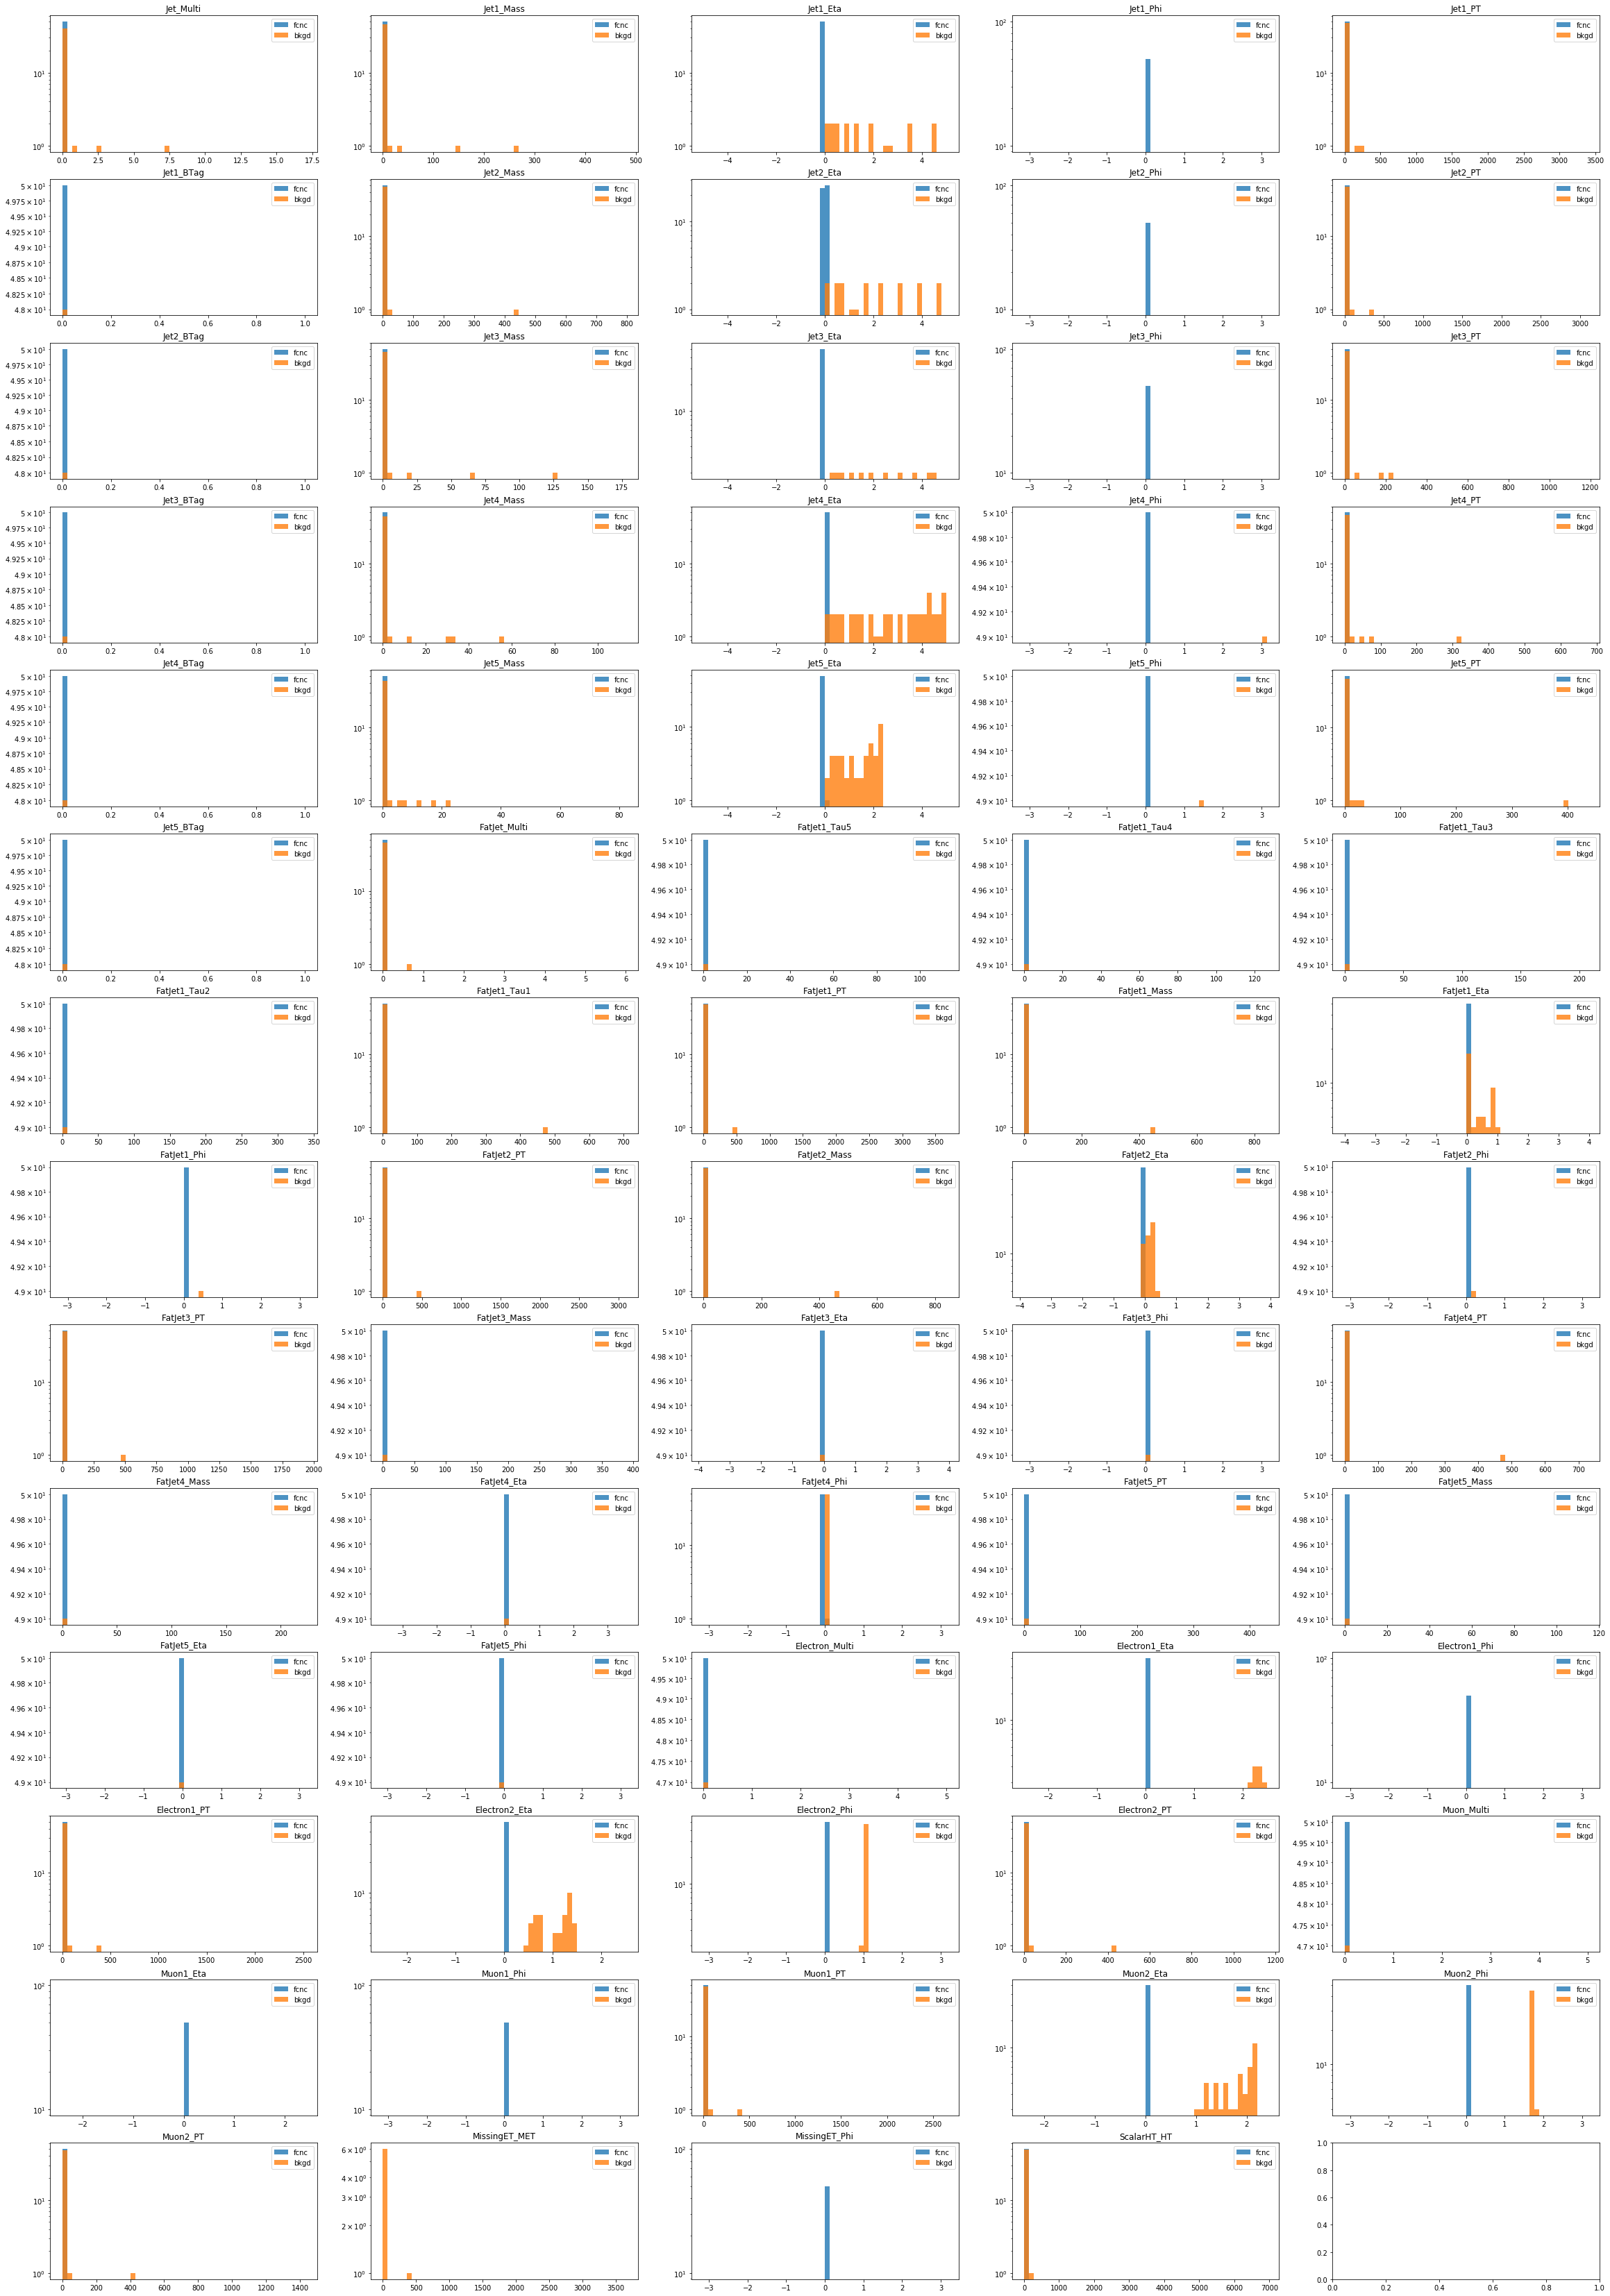

In [5]:
# Variáveis de ajuste dos plots
num_cols, bins = 5, 50

# Criar os plots
num_rows = int(np.ceil((len(list(fcnc_data.columns)) - 1) / num_cols))
fig, axs = plt.subplots(num_rows, num_cols, figsize=(40, 60))

# Iterar e plotar cada um deles
for i, column in enumerate(fcnc_data.columns):
    if fcnc_data.columns[i] != "gen_weights":
        # Definir a range do histograma
        hist_min = min(fcnc_data[column].min(), bkgd_data[column].min())
        hist_max = max(fcnc_data[column].max(), bkgd_data[column].max())
        hist_range = (hist_min, hist_max)
        
        # Obter os dados do histograma
        fcnc_hist, fcnc_bins = np.histogram(fcnc_data[column],
                                            bins=bins,
                                            range=hist_range,
                                            weights=fcnc_data["gen_weights"])
        bkgd_hist, bkgd_bins = np.histogram(bkgd_data[column],
                                            bins=bins,
                                            range=hist_range,
                                            weights=bkgd_data["gen_weights"])

        # Dar plot aos dados
        row, column = int(i/num_cols), i%num_cols
        axs[row, column].set_title(fcnc_data.columns[i])
        axs[row, column].hist(fcnc_hist, bins=fcnc_bins, 
                              label="fcnc", alpha=0.8)
        axs[row, column].hist(bkgd_hist, bins=bkgd_bins, 
                              label="bkgd", alpha=0.8)
        axs[row, column].set_yscale("log")
        axs[row, column].legend()
    
plt.show()

Significado dos gráficos:
- BTag: Ocorrência ou não de jatos a partir de muões b
- Missing: Momento de partículas não detetadas que falta para se verificar a conservação de momento na colisão
- ScalarHT: Momento total (norma) missing
- Fat_jet_multi: quantos fat jets existem, os plots fat_jets1, 2, etc descrevem cada um
- Picos em zero devido a certos acontecimentos não serem detetados em certas samples